In [54]:
# imports
import seaborn as sns 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### Healthy Control Averaging

This is pretty non-ideal for going through a million people. I'd suggest limiting yourself to 2-3 tracts for the moment so it's not overwhelming! Genu or Splenium (parts of the corpus callosum, CC_2, CC_7) often show periventricular lesions in MS so that could be interesting to characterize. Maybe also ATR (L/R) or SLF?

In [2]:
all_subjects = [
    # "02-CON-005",
    # "02-CON-138",
    # "02-CON-139",
    # "02-CON-141",
    # "02-CON-159",
    #
    "02-CON-160",
    "02-CON-162",
    "02-CON-163",
    "02-CON-165",
    #
    "02-PPM-010",
    "02-PPM-072",
    "02-PPM-111",
    "02-PPM-112",
    "02-PPM-129",
    "02-PPM-136",
    # "02-PPM-149",
    # "02-PPM-154",
    # "02-PPM-155",
    # "02-PPM-183",
    # "02-PPM-192",
    # "02-PPM-201",
    # "02-PPM-206",
    # "02-PPM-222",
    #
    "02-RRM-009",
    "02-RRM-034",
    "02-RRM-052",
    "02-RRM-055",
    "02-RRM-093",
    "02-RRM-116",
    "02-RRM-125",
    "02-RRM-133",
    "02-RRM-137",
    "02-RRM-144",
    "02-RRM-145",
    "02-RRM-146",
    "02-RRM-147",
    "02-RRM-148",
    "02-RRM-150",
    "02-RRM-151",
    "02-RRM-152",
    "02-RRM-168",
    "02-RRM-170",
    # "02-RRM-171",
    # "02-RRM-172",
    # "02-RRM-173",
    # "02-RRM-174",
    # "02-RRM-176",
    # "02-RRM-178",
    # "02-RRM-180",
    # "02-RRM-181",
    # "02-RRM-186",
    # "02-RRM-194",
    # "02-RRM-196",
    # "02-RRM-198",
    # "02-RRM-208",
    # "02-RRM-209",
    # "02-RRM-210",
    # "02-RRM-214",
    # "02-RRM-215",
    # "02-RRM-217",
    # "02-RRM-219",
    # "02-RRM-221",
    #
    "02-RIS-022",
    "02-RIS-054",
    "02-RIS-123",
    "02-RIS-124",
    "02-RIS-158",
    # "02-RIS-161",
    # "02-RIS-177",
    # "02-RIS-184",
    # "02-RIS-185",
    # "02-RIS-200",
    # "02-RIS-202",
    # "02-RIS-204",
    # "02-RIS-211"
]

In [3]:
# function definitions

def get_hc_norm(healthy_subjects, tract, mwf_hc_mean, fa_hc_mean):
    # Make average healthy tract profile for the metrics
    mwf_hc_norm = pd.DataFrame()
    fa_hc_norm = pd.DataFrame()
    
    for subject in healthy_subjects:
        working_dir = 'D:/adria/P449_ID/by_patient_subset/' + str(subject) + '/Tractography/tractseg/'

        mwf_data = pd.read_csv(working_dir + 'Tractometry_mwf.csv', index_col=False, delimiter=';')
        mwf_hc_norm[str(subject)] = (mwf_data[tract] - mwf_hc_mean[tract].min())/(mwf_hc_mean[tract].max() - mwf_hc_mean[tract].min())
        
        fa_data = pd.read_csv(working_dir + 'Tractometry_fa.csv', index_col=False, delimiter=';')
        fa_hc_norm[str(subject)] = (fa_data[tract] - fa_hc_mean[tract].min())/(fa_hc_mean[tract].max() - fa_hc_mean[tract].min())

    mwf_hc_norm = mwf_hc_norm.transpose().melt()
    fa_hc_norm = fa_hc_norm.transpose().melt()
    return mwf_hc_norm, fa_hc_norm

def get_ms_norm(subject, tract, mwf_hc_mean, fa_hc_mean):
        mwf_ms_norm = pd.DataFrame()
        fa_ms_norm = pd.DataFrame()

        working_dir = 'D:/adria/P449_ID/by_patient_subset/' + str(subject) + '/Tractography/tractseg/'

        mwf_data = pd.read_csv(working_dir + 'Tractometry_mwf.csv', index_col=False, delimiter=';')
        mwf_ms_norm['value'] = (mwf_data[tract] - mwf_hc_mean[tract].min())/(mwf_hc_mean[tract].max() - mwf_hc_mean[tract].min())
        mwf_ms_norm['index'] = np.linspace(0,len(mwf_data)-1, len(mwf_data))
        
        fa_data = pd.read_csv(working_dir + 'Tractometry_fa.csv', index_col=False, delimiter=';')
        fa_ms_norm['value'] = (fa_data[tract] - fa_hc_mean[tract].min())/(fa_hc_mean[tract].max() - fa_hc_mean[tract].min())
        fa_ms_norm['index'] = np.linspace(0,len(mwf_data)-1, len(mwf_data))

        return mwf_ms_norm, fa_ms_norm

def plot_ms_tract(hc_norm, ms_norm, title, label):
    # Plot out 
    plt.figure()
    sns.set_palette('tab20')
    # assumes label is either 'MWF' or 'FA'

    match label:
        case "MWF":
            color='#ff7f0e'
        case "FA":
            color='#1f77b4'

    g = sns.lineplot(data=hc_norm, x='variable', y='value', color=color, linestyle='dashed', label="Control", alpha=0.2, errorbar=('ci', 95))
    label = 'MS ' + label
    sns.lineplot(data=ms_norm, x='index', y='value', color=color, label=label, errorbar = None)
    
    g.set_xlabel('Position along tract (L-R)')
    g.set_ylabel('Normalized metric')
    g.set_title(title)
    g.legend(bbox_to_anchor=(1.25,1.03), loc='upper right')
    plt.show()
    
    return None

In [4]:
# First create a mean HEALTHY set of data from all healthy peoples' tract profiles for each tract of interest.
healthy_subjects = [
    "02-CON-005",
    "02-CON-138",
    "02-CON-139",
    "02-CON-141",
    "02-CON-159",
    "02-CON-160",
    "02-CON-162",
    "02-CON-163",
    "02-CON-165"
]
# Set up list of tracts to look at
# tracts = ['CC_2', 'CC_7']
# tracts = ['AF_left', 'AF_right', 'ATR_left', 'ATR_right', 'CC_1', 'CC_2', 'CC_3', 'CC_4', 'CC_5', 'CC_6', 'CC_7', 'CG_left', 'CG_right', 'CST_left', 'CST_right', 'SLF_I_left', 'SLF_I_right', 'SLF_II_left', 'SLF_II_right', 'SLF_III_left', 'SLF_III_right']
tracts = ["AF_left", "AF_right", "ATR_left", "ATR_right", "CC_1", "CC_2", "CC_3", "CC_4", "CC_5", "CC_6", "CC_7", "CG_left", "CG_right", "CST_left", "CST_right", "FPT_left", "FPT_right", "ICP_left", "ICP_right", "IFO_left", "IFO_right", "ILF_left", "ILF_right", "MCP", "OR_left", "OR_right", "POPT_left", "POPT_right", "SCP_left", "SCP_right", "SLF_I_left", "SLF_I_right", "SLF_II_left", "SLF_II_right", "SLF_III_left", "SLF_III_right", "STR_left", "STR_right", "UF_left", "UF_right", "T_PREM_left", "T_PREM_right", "T_PAR_left", "T_PAR_right", "T_OCC_left", "T_OCC_right", "ST_FO_left", "ST_FO_right", "ST_PREM_left", "ST_PREM_right"]


mwf_hc_mean = pd.DataFrame()
fa_hc_mean = pd.DataFrame()

#Go through each tract and get each subject's data
for tract in tracts:
    mwf_hc = pd.DataFrame()
    fa_hc = pd.DataFrame()
    
    for subject in healthy_subjects:
        working_dir = 'D:/adria/P449_ID/by_patient_subset/' + str(subject) + '/Tractography/tractseg/'
        
        mwf_data = pd.read_csv(working_dir + 'Tractometry_mwf.csv', index_col=False, delimiter=';')
        mwf_hc[str(subject)] = mwf_data[tract] 

        fa_data = pd.read_csv(working_dir + 'Tractometry_fa.csv', index_col=False, delimiter=';')
        fa_hc[str(subject)] = fa_data[tract]

    # Take the mean across all subjects and store it in _mean, for each specific tract. 
    mwf_hc_mean[str(tract)] = mwf_hc.mean(axis=1)
    fa_hc_mean[str(tract)] = fa_hc.mean(axis=1)

# Sanity check that min/max values make sense. MWF should be <0.2 generally, FA should be 0.2-0.5ish.
print('Min MWF: ', mwf_hc_mean['FPT_left'].min())
print('Max MWF: ', mwf_hc_mean['ST_PREM_right'].max())
print('Min FA: ', fa_hc_mean['OR_left'].min())
print('Max FA: ', fa_hc_mean['CST_left'].max())

Min MWF:  0.00039892262785388977
Max MWF:  0.12340229721498812
Min FA:  0.2382702700331763
Max FA:  0.7035557896188155


Now we can plot out each tract of interest. Here we plot the average of HCs for each tract of interest (with 95% confidence interval).
Since MWF and FA have different dynamic ranges, it is useful to normalize them somehow so they can be plotted and interpreted together. Here we do min-max normalization using the healthy population min/max.

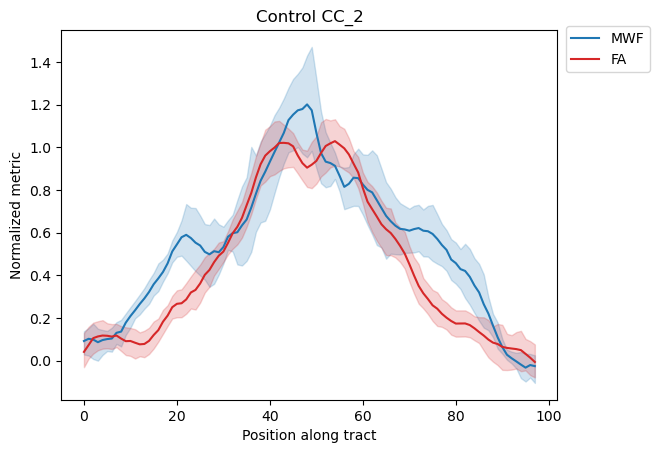

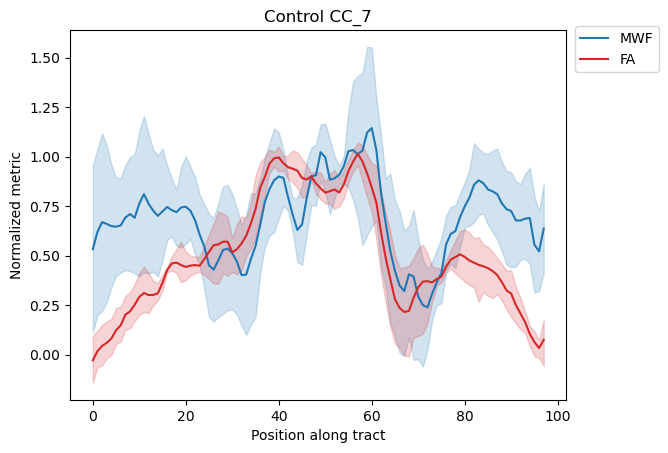

In [5]:
# Now with our mean data we can start plotting out all HCs. First normalize all the data (for each tract) using the HC mean, then plot it out.
subjects = [
    "02-CON-160",
    "02-CON-162",
    "02-CON-163",
    "02-CON-165"
]

tracts = ['CC_2', 'CC_7']
for tract in tracts:

    mwf_hc_norm, fa_hc_norm = get_hc_norm(subjects, tract, mwf_hc_mean, fa_hc_mean)
    
    # This will generate a separate figure for each metric!
    plt.figure()
    g = sns.lineplot(data=mwf_hc_norm, x='variable', y='value', color='#1f77b4', label='MWF', errorbar=('ci', 95)) #Lineplot default is to show mean and 95% CI.
    sns.lineplot(data=fa_hc_norm, x='variable', y='value', color='#d62728', label='FA', errorbar=('ci', 95))
    g.set_xlabel('Position along tract')
    g.set_ylabel('Normalized metric')
    title = 'Control ' + tract
    g.set_title(title)
    g.legend(bbox_to_anchor=(1.20,1.03), loc='upper right')
    

### Testing on 1 MS
Now we have an idea of what healthy control patterns look like, we can look at MS. This code is really for looking at one MS person at a time. Need to rethink how to best show many MS people, lesions etc.

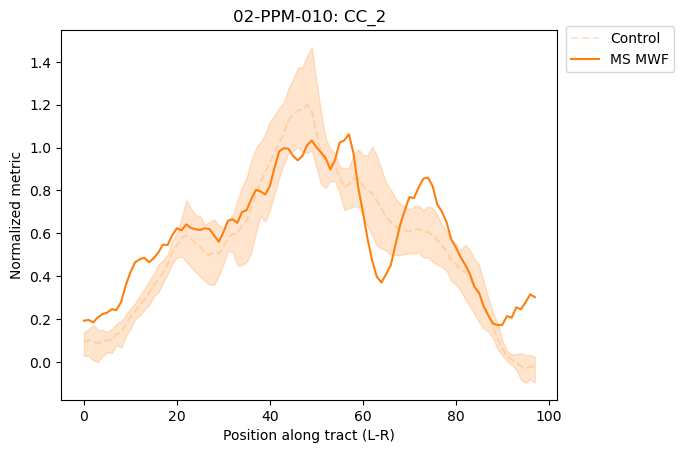

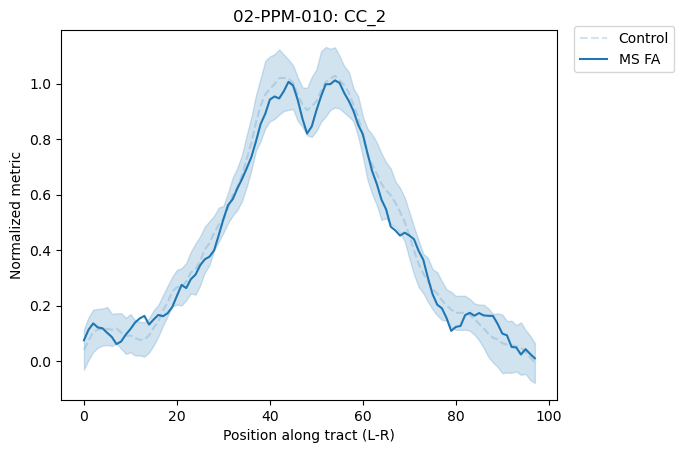

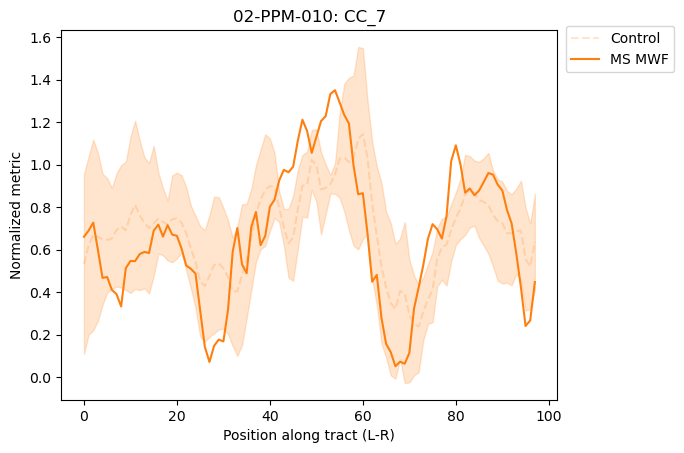

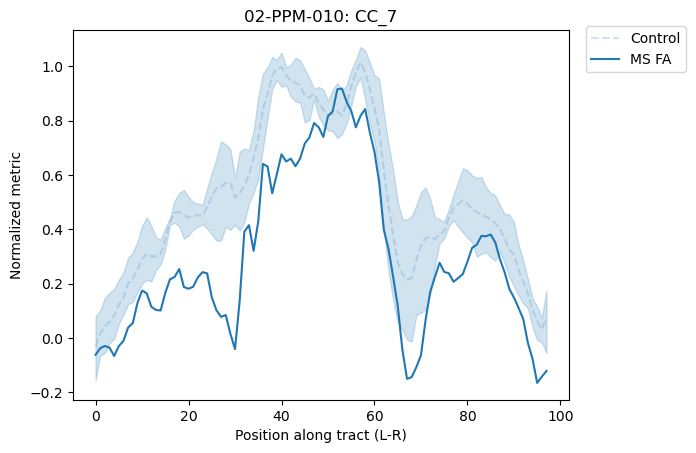

In [6]:
# MUST run the first couple of code blocks before this one!!!

# Set up all the healthy people first for comparison
subjects = [
    "02-CON-160",
    "02-CON-162",
    "02-CON-163",
    "02-CON-165"
]
# This is each MS person
special_subjects = ['02-PPM-010'] 
# Tracts of interest
tracts = ['CC_2', 'CC_7']

for tract in tracts:
    # Set up dataframes for average of all HCs (min-max normalized) and the special MS subject
    mwf_hc_norm, fa_hc_norm = get_hc_norm(subjects, tract, mwf_hc_mean, fa_hc_mean)
       
    mwf_ms_norm = pd.DataFrame()
    fa_ms_norm = pd.DataFrame()
    
    # Make MS tract profile, to later overlay on average healthy profile.
    for subject in special_subjects:

        mwf_ms_norm, fa_ms_norm = get_ms_norm(subject, tract, mwf_hc_mean, fa_hc_mean)
        title = "MS Subject: " + subject + " " + tract

        # # Plot out 
        title = subject + ": " + tract
        plot_ms_tract(mwf_hc_norm, mwf_ms_norm, title, "MWF")
        plot_ms_tract(fa_hc_norm, fa_ms_norm, title, "FA")    

In [7]:
def make_many_ms_subplots(tracts, ms_subjects):
    cols = ['{}'.format(col) for col in ms_subjects]
    rows = ['{}'.format(row) for row in tracts]

    fig, ax = plt.subplots(nrows=len(tracts), ncols=len(ms_subjects), figsize=(15, 15), sharex = True) # width, height

    for ax_row, col in zip(ax[0], cols):
        ax_row.set_title(col)

    for ax_col, row in zip(ax[:,0], rows):
        ax_col.set_ylabel(row, rotation=90, size='large')

    for i in range(len(tracts)):
        tract = tracts[i]
        # Set up dataframes for average of all HCs (min-max normalized) and the special MS subject
        mwf_hc_norm, fa_hc_norm = get_hc_norm(healthy_subjects, tract, mwf_hc_mean, fa_hc_mean)
        
        mwf_ms_norm = pd.DataFrame()
        fa_ms_norm = pd.DataFrame()
        for j in range(len(ms_subjects)):
            subject = ms_subjects[j]

            mwf_ms_norm, fa_ms_norm = get_ms_norm(subject, tract, mwf_hc_mean, fa_hc_mean)  
            # title = "MS Subject: " + subject + " " + tract

            # # Plot out 
            # title = subject + ": " + tract

            sns.set_palette('tab20')
            sns.lineplot(ax = ax[i,j], data=mwf_hc_norm, x='variable', y='value', color='#1f77b4', linestyle='dashed', label='MWF', alpha=0.2)
            sns.lineplot(ax = ax[i,j], data=mwf_ms_norm, x='index', y='value', color='#1f77b4',  label='MS MWF')
            sns.lineplot(ax = ax[i,j], data=fa_hc_norm, x='variable', y='value', color='#ff7f0e',  linestyle='dashed', label='FA', alpha=0.2)
            sns.lineplot(ax = ax[i,j], data=fa_ms_norm, x='index', y='value', color='#ff7f0e',  label='MS FA')
            ax[i,j].get_legend().remove()
            ax[i,j].set_xlabel('Position along tract (L-R)')

            # Plot regions where MS values are less than HC values in red
            
            # mwf_less_than_hc = mwf_ms_norm[mwf_ms_norm['value'] < mwf_hc_norm['value']]
            # fa_less_than_hc = fa_ms_norm[fa_ms_norm['value'] < fa_hc_norm['value']]
            # ax[i,j].plot(mwf_less_than_hc.index, mwf_less_than_hc['value'], color='red', linestyle='-', linewidth=2)
            # ax[i,j].plot(fa_less_than_hc.index, fa_less_than_hc['value'], color='red', linestyle='-', linewidth=2)
            # Set y-labels
            if j != 0:
                ax[i, j].set_ylabel('')
            
    # Collect unique legend handles and labels
    handles, labels = ax[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), fancybox=True, shadow=True, ncol=4)

    plt.tight_layout()
    plt.show()
    return None 


def make_single_plots(tracts, ms_subjects, fa_hc_mean, mwf_hc_mean):
    for tract in tracts:
        # Set up dataframes for average of all HCs (min-max normalized) and the special MS subject
        mwf_hc_norm, fa_hc_norm = get_hc_norm(healthy_subjects, tract, mwf_hc_mean, fa_hc_mean)
        
        mwf_ms_norm = pd.DataFrame()
        fa_ms_norm = pd.DataFrame()
    
        # Make MS tract profile, to later overlay on average healthy profile.
        for subject in ms_subjects:

            mwf_ms_norm, fa_ms_norm = get_ms_norm(subject, tract, mwf_hc_mean, fa_hc_mean)
            title = "MS Subject: " + subject + " " + tract

            # # Plot out 
            title = subject + ": " + tract
            # This will generate a separate figure for each metric!
            plt.figure()
            g = sns.lineplot(data=mwf_hc_norm, x='variable', y='value', color='#1f77b4', linestyle='dashed', label='MWF', errorbar=('ci', 95), alpha=0.2) #Lineplot default is to show mean and 95% CI.
            sns.lineplot(data=fa_hc_norm, x='variable', y='value', color='#ff7f0e', linestyle='dashed', label='FA', errorbar=('ci', 95), alpha=0.2)
            sns.lineplot(data=mwf_ms_norm, x='index', y='value', color='#1f77b4', label='MWF', errorbar = None)
            sns.lineplot(data=fa_ms_norm, x='index', y='value', color='#ff7f0e', label='FA', errorbar = None)
            g.set_xlabel('Position along tract')
            g.set_ylabel('Normalized metric')
            title = 'Control ' + tract
            g.set_title(title)
            g.legend(bbox_to_anchor=(1.20,1.03), loc='upper right')
    return None



### Tracts with lesions

There are more .tck files than actual columns in the tractometry csv's. Here are the columns in tractometry: 

AF_left;AF_right;ATR_left;ATR_right

CC_1;CC_2;CC_3;CC_4;CC_5;CC_6;CC_7

CG_left;CG_right;CST_left;CST_right;

FPT_left;FPT_right;ICP_left;

ICP_right;IFO_left;IFO_right;ILF_left;ILF_right;MCP;

OR_left;OR_right;

POPT_left;POPT_right;

SCP_left;SCP_right;

SLF_I_left;SLF_I_right;SLF_II_left;SLF_II_right;SLF_III_left;SLF_III_right;

STR_left;STR_right;

UF_left;UF_right;

T_PREM_left;T_PREM_right;T_PAR_left;T_PAR_right;T_OCC_left;T_OCC_right;

ST_FO_left;ST_FO_right;ST_PREM_left;ST_PREM_right

### Plotting Groups of Subjects with lesions

In [8]:
def make_and_highlight_ms_subplots(tracts, ms_subjects, ms_tracts_df):
    cols = ['{}'.format(col) for col in ms_subjects]
    rows = ['{}'.format(row) for row in tracts]

    # fig, ax = plt.subplots(nrows=len(tracts), ncols=len(ms_subjects), figsize=(8, 8), sharex=True) # width, height
    fig, ax = plt.subplots(nrows=len(tracts), ncols=len(ms_subjects), figsize=(15, 70), sharex=True) # width, height
    for ax_row, col in zip(ax[0], cols):
        ax_row.set_title(col)

    for ax_col, row in zip(ax[:,0], rows):
        ax_col.set_ylabel(row, rotation=90, size='large')

    for i in range(len(tracts)):
        tract = tracts[i]
        # Set up dataframes for average of all HCs (min-max normalized) and the special MS subject
        mwf_hc_norm, fa_hc_norm = get_hc_norm(healthy_subjects, tract, mwf_hc_mean, fa_hc_mean)
        
        mwf_ms_norm = pd.DataFrame()
        fa_ms_norm = pd.DataFrame()
        for j in range(len(ms_subjects)):
            subject = ms_subjects[j]

            mwf_ms_norm, fa_ms_norm = get_ms_norm(subject, tract, mwf_hc_mean, fa_hc_mean)  
            sns.set_palette('tab20')
            sns.lineplot(ax=ax[i,j], data=mwf_hc_norm, x='variable', y='value', color='#1f77b4', linestyle='dashed', label='MWF', alpha=0.2)
            sns.lineplot(ax=ax[i,j], data=mwf_ms_norm, x='index', y='value', color='#1f77b4',  label='MS MWF')
            sns.lineplot(ax=ax[i,j], data=fa_hc_norm, x='variable', y='value', color='#ff7f0e',  linestyle='dashed', label='FA', alpha=0.2)
            sns.lineplot(ax=ax[i,j], data=fa_ms_norm, x='index', y='value', color='#ff7f0e',  label='MS FA')
            ax[i,j].set_xlabel('Position along tract (L-R)')
            ax[i,j].get_legend().remove()
            
            pivot_mwf_hc = mwf_hc_norm.pivot_table(index='variable', values='value', aggfunc='mean')
            pivot_fa_hc = fa_hc_norm.pivot_table(index='variable', values='value', aggfunc='mean')
            diff_mwf = pivot_mwf_hc['value'] - mwf_ms_norm['value']
            diff_fa = pivot_fa_hc['value'] - fa_ms_norm['value']
            
            # Calculate RMSE
            rmse_mwf = np.sqrt(np.mean(np.square(diff_mwf)))
            rmse_fa = np.sqrt(np.mean(np.square(diff_fa)))

            # Calculate diff % 
            mape_mwf = np.mean(np.abs(diff_mwf)) * 100
            mape_fa = np.mean(np.abs(diff_fa)) * 100

            text = f"MWF: {rmse_mwf:.2f} rms, {mape_mwf:.2f}% diff\nFA: {rmse_fa:.2f} rms, {mape_fa:.2f}% diff"
        
            # Add text to the bottom of the subplot
            ax[i, j].text(0.5, 0.1, text, horizontalalignment='center', verticalalignment='center', transform=ax[i, j].transAxes)


            # Check if the subject-tract combination exists in the DataFrame
            if ms_tracts_df.loc[ms_tracts_df['Patient'] == subject, tract].notnull().any():
                # Add red borders to the subplot
                ax[i,j].spines['top'].set_color('red')
                ax[i,j].spines['top'].set_linewidth(2.5) # Adjust thickness as needed
                ax[i,j].spines['right'].set_color('red')
                ax[i,j].spines['right'].set_linewidth(2.5) # Adjust thickness as needed
                ax[i,j].spines['bottom'].set_color('red')
                ax[i,j].spines['bottom'].set_linewidth(2.5) # Adjust thickness as needed
                ax[i,j].spines['left'].set_color('red')
                ax[i,j].spines['left'].set_linewidth(2.5) # Adjust thickness as needed`
                

            if j != 0:
                ax[i, j].set_ylabel('')

    handles, labels = ax[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.01), fancybox=True, shadow=True, ncol=4)

    plt.tight_layout()
    plt.show()
    
    return None 

In [9]:
# Parse data into a DataFrame
ms_tracts_df = pd.read_csv("data/subject_lesion_locations_2.csv")
print(ms_tracts_df.columns)
columns_list = [
    "CC_1", "CC_2", "CC_3", "CC_4", "CC_5", "CC_6", "CC_7", "SLF_I_right", "SLF_I_left",
    "SLF_II_right", "SLF_II_left", "SLF_III_left", "SLF_III_right", "T_PAR_right", "T_PAR_left",
    "STR_left", "STR_right", "ST_FO_right", "FPT_left", "CST_right", "CST_left",
    "AF_left", "AF_right", "CG_left", "ATR_right", "ATR_left", "IFO_left", 
    "IFO_right", "OR_left", "OR_right"
]

print(len(columns_list))
aaa = ms_tracts_df.columns
print(len(aaa) -2)

Index(['Patient', 'Notes', 'CC_1', 'CC_2', 'CC_3', 'CC_4', 'CC_5', 'CC_6',
       'CC_7', 'SLF_I_right', 'SLF_I_left', 'SLF_II_right', 'SLF_II_left',
       'SLF_III_left', 'SLF_III_right', 'T_PAR_right', 'T_PAR_left',
       'STR_left', 'STR_right', 'ST_FO_right', 'FPT_left', 'CST_right',
       'CST_left', 'AF_left', 'AF_right', 'CG_left', 'ATR_right', 'ATR_left',
       'IFO_left', 'IFO_right', 'OR_left', 'OR_right'],
      dtype='object')
30
30


### Getting different metrics

In [10]:
def calculate_ms_metrics(tracts, ms_subjects, ms_tracts_df):
    mwf_dict_mape = {}
    fa_dict_mape = {}

    mwf_dict_rms = {}
    fa_dict_rms = {}

    mwf_dict_mpe = {}
    fa_dict_mpe = {}

    m_count = 0
    f_count = 0
    b_count = 0

    for i in range(len(tracts)):
        tract = tracts[i]
        # Set up dataframes for average of all HCs (min-max normalized) and the special MS subject
        mwf_hc_norm, fa_hc_norm = get_hc_norm(healthy_subjects, tract, mwf_hc_mean, fa_hc_mean)
        
        mwf_ms_norm = pd.DataFrame()
        fa_ms_norm = pd.DataFrame()
        for j in range(len(ms_subjects)):
            subject = ms_subjects[j]

            mwf_ms_norm, fa_ms_norm = get_ms_norm(subject, tract, mwf_hc_mean, fa_hc_mean)
            
            pivot_mwf_hc = mwf_hc_norm.pivot_table(index='variable', values='value', aggfunc='mean')
            pivot_fa_hc = fa_hc_norm.pivot_table(index='variable', values='value', aggfunc='mean')
            diff_mwf = pivot_mwf_hc['value'] - mwf_ms_norm['value']
            diff_fa = pivot_fa_hc['value'] - fa_ms_norm['value']
            
            # Calculate RMS err.
            rmse_mwf = np.sqrt(np.mean(np.square(diff_mwf)))
            rmse_fa = np.sqrt(np.mean(np.square(diff_fa)))

            # Calculate mean abs % err.
            mape_mwf = np.mean(np.abs(diff_mwf)) * 100
            mape_fa = np.mean(np.abs(diff_fa)) * 100

            # Calculate mean abs % err.
            mpe_mwf = np.mean(diff_mwf) * 100
            mpe_fa = np.mean(diff_fa) * 100

            # Check if the subject-tract combination exists in the DataFrame
            entry = ms_tracts_df.loc[ms_tracts_df['Patient'] == subject, tract]

            # Update counters based on the cell value
            entry = ms_tracts_df.loc[ms_tracts_df['Patient'] == subject, tract]
            if not entry.empty:
                cell_value = entry.iloc[0]
                if cell_value == "m":
                    m_count += 1
                elif cell_value == "f":
                    f_count += 1
                elif cell_value == "b":
                    b_count += 1

            if not entry.empty:  # Check if there's any entry for the subject-tract combination
                cell_value = entry.iloc[0]  # Extract the value from the DataFrame cell

                # if cell_value == "n":
                #     print(f"Subject {subject}, Tract {tract}: neither")
                    
                if cell_value == "m":
                    if subject not in mwf_dict_mape:
                        mwf_dict_mape[subject] = []
                        mwf_dict_rms[subject] = []
                        mwf_dict_mpe[subject] = []
                    mwf_dict_mape[subject].append(mape_mwf)
                    mwf_dict_rms[subject].append(rmse_mwf)
                    mwf_dict_mpe[subject].append(mpe_mwf)

                elif cell_value == "f":
                    if subject not in fa_dict_mape:
                        fa_dict_mape[subject] = []
                        fa_dict_rms[subject] = []
                        fa_dict_mpe[subject] = []
                    fa_dict_mape[subject].append(mape_fa)
                    fa_dict_rms[subject].append(rmse_fa)
                    fa_dict_mpe[subject].append(mpe_fa)

                elif cell_value == "b":
                    if subject not in mwf_dict_mape:
                        mwf_dict_mape[subject] = []
                        mwf_dict_rms[subject] = []
                        mwf_dict_mpe[subject] = []
                    if subject not in fa_dict_mape:
                        fa_dict_mape[subject] = []
                        fa_dict_rms[subject] = []
                        fa_dict_mpe[subject] = []

                    mwf_dict_mape[subject].append(mape_mwf)
                    mwf_dict_rms[subject].append(rmse_mwf)
                    mwf_dict_mpe[subject].append(mpe_mwf)

                    fa_dict_mape[subject].append(mape_fa)
                    fa_dict_rms[subject].append(rmse_fa)
                    fa_dict_mpe[subject].append(mpe_fa)
            else:
                print(f"No entry found for Subject {subject}, Tract {tract}")
    return mwf_dict_mape, fa_dict_mape, mwf_dict_rms, fa_dict_rms, mwf_dict_mpe, fa_dict_mpe, m_count, f_count, b_count

In [11]:
# Parse data into a DataFrame
ms_lesion_category = pd.read_csv("data/subject_lesion_categorizations_2.csv")
print(ms_lesion_category.columns)

Index(['Patient', 'CC_1', 'CC_2', 'CC_3', 'CC_4', 'CC_5', 'CC_6', 'CC_7',
       'SLF_I_right', 'SLF_I_left', 'SLF_II_right', 'SLF_II_left',
       'SLF_III_left', 'SLF_III_right', 'T_PAR_right', 'T_PAR_left',
       'T_POSTC_right', 'T_POSTC_left', 'T_PREC_left', 'T_PREF_left',
       'ST_PREC_left', 'ST_PAR_left', 'STR_left', 'STR_right', 'ST_FO_right',
       'FPT_left', 'CST_right', 'CST_left', 'AF_left', 'AF_right', 'CG_left',
       'ATR_right', 'ATR_left', 'IFO_left', 'IFO_right', 'OR_left',
       'OR_right'],
      dtype='object')


In [12]:
# Parse data into a DataFrame
ms_tracts_df = pd.read_csv("data/subject_lesion_locations_2.csv")
print(ms_tracts_df.columns)
columns_list = [
    "CC_1", "CC_2", "CC_3", "CC_4", "CC_5", "CC_6", "CC_7", "SLF_I_right", "SLF_I_left",
    "SLF_II_right", "SLF_II_left", "SLF_III_left", "SLF_III_right", "T_PAR_right", "T_PAR_left",
    "STR_left", "STR_right", "ST_FO_right", "FPT_left", "CST_right", "CST_left",
    "AF_left", "AF_right", "CG_left", "ATR_right", "ATR_left", "IFO_left", 
    "IFO_right", "OR_left", "OR_right"
]

print(len(columns_list))
aaa = ms_tracts_df.columns
print(len(aaa) -2)

Index(['Patient', 'Notes', 'CC_1', 'CC_2', 'CC_3', 'CC_4', 'CC_5', 'CC_6',
       'CC_7', 'SLF_I_right', 'SLF_I_left', 'SLF_II_right', 'SLF_II_left',
       'SLF_III_left', 'SLF_III_right', 'T_PAR_right', 'T_PAR_left',
       'STR_left', 'STR_right', 'ST_FO_right', 'FPT_left', 'CST_right',
       'CST_left', 'AF_left', 'AF_right', 'CG_left', 'ATR_right', 'ATR_left',
       'IFO_left', 'IFO_right', 'OR_left', 'OR_right'],
      dtype='object')
30
30


In [13]:
all_ppm = [
    "02-PPM-010",
    "02-PPM-072",
    "02-PPM-111",
    "02-PPM-129",
    "02-PPM-136",
    #
    "02-PPM-154",
    "02-PPM-155",
    "02-PPM-183",
    "02-PPM-192",
    "02-PPM-201",
    "02-PPM-206",
    "02-PPM-222"
]

ppm_mwf_dict_mape, ppm_fa_dict_mape, ppm_mwf_dict_rms, ppm_fa_dict_rms, ppm_mwf_dict_mpe, ppm_fa_dict_mpe, ppm_m_count, ppm_f_count, ppm_b_count = calculate_ms_metrics(columns_list, all_ppm, ms_lesion_category)

# # Calculate the mean of all the mape values in mwf_dict
# ppm_mwf_mean_mape = np.mean([np.mean(values) for values in ppm_mwf_dict_mape.values()])

# # Calculate the mean of all the mape values in fa_dict
# ppm_fa_mean_mape = np.mean([np.mean(values) for values in ppm_fa_dict_mape.values()])

# # Calculate the mean of all the rms values in mwf_dict
# ppm_mwf_mean_rms = np.mean([np.mean(values) for values in ppm_mwf_dict_rms.values()])

# # Calculate the mean of all the rms values in fa_dict
# ppm_fa_mean_rms = np.mean([np.mean(values) for values in ppm_fa_dict_rms.values()])

# # Calculate the mean of all the mpe values in mwf_dict
# ppm_mwf_mean_mpe = np.mean([np.mean(values) for values in ppm_mwf_dict_mpe.values()])

# # Calculate the mean of all the mpe values in fa_dict
# ppm_fa_mean_mpe = np.mean([np.mean(values) for values in ppm_fa_dict_mpe.values()])

# print("Mean MAPE for mwf_dict:", ppm_mwf_mean_mape)
# print("Mean MAPE for fa_dict:", ppm_fa_mean_mape)
# print("Mean RMS for mwf_dict:", ppm_mwf_mean_rms)
# print("Mean RMS for fa_dict:", ppm_fa_mean_rms)
# print("Mean MPE for mwf_dict:", ppm_mwf_mean_mpe)
# print("Mean MPE for fa_dict:", ppm_fa_mean_mpe)
# print("Count for 'm':", ppm_m_count)
# print("Count for 'f':", ppm_f_count)
# print("Count for 'b':", ppm_b_count)

###

# For ppm_mwf_dict_mape
aa = list(ppm_mwf_dict_mape.values())
ppm_mwf_dict_mape_vals = [item for sublist in aa for item in sublist]

# For ppm_fa_dict_mape
aa = list(ppm_fa_dict_mape.values())
ppm_fa_dict_mape_vals = [item for sublist in aa for item in sublist]

# For ppm_mwf_dict_rms
aa = list(ppm_mwf_dict_rms.values())
ppm_mwf_dict_rms_vals = [item for sublist in aa for item in sublist]

# For ppm_fa_dict_rms
aa = list(ppm_fa_dict_rms.values())
ppm_fa_dict_rms_vals = [item for sublist in aa for item in sublist]

# For ppm_mwf_dict_mpe
aa = list(ppm_mwf_dict_mpe.values())
ppm_mwf_dict_mpe_vals = [item for sublist in aa for item in sublist]

# For ppm_fa_dict_mpe
aa = list(ppm_fa_dict_mpe.values())
ppm_fa_dict_mpe_vals = [item for sublist in aa for item in sublist]

In [14]:
all_rrm = [
    "02-RRM-009",
    "02-RRM-034",
    "02-RRM-052",
    "02-RRM-055",
    "02-RRM-093",
    "02-RRM-116",
    "02-RRM-125",
    "02-RRM-133",
    "02-RRM-137",
    "02-RRM-144",
    "02-RRM-145",
    "02-RRM-146",
    "02-RRM-147",
    "02-RRM-148",
    "02-RRM-150",
    "02-RRM-151",
    "02-RRM-152",
    "02-RRM-168",
    "02-RRM-170"
]

rrm_mwf_dict_mape, rrm_fa_dict_mape, rrm_mwf_dict_rms, rrm_fa_dict_rms, rrm_mwf_dict_mpe, rrm_fa_dict_mpe, rrm_m_count, rrm_f_count, rrm_b_count = calculate_ms_metrics(columns_list, all_rrm, ms_lesion_category)

# # Calculate the mean of all the mape values in mwf_dict
# rrm_mwf_mean_mape = np.mean([np.mean(values) for values in rrm_mwf_dict_mape.values()])

# # Calculate the mean of all the mape values in fa_dict
# rrm_fa_mean_mape = np.mean([np.mean(values) for values in rrm_fa_dict_mape.values()])

# # Calculate the mean of all the rms values in mwf_dict
# rrm_mwf_mean_rms = np.mean([np.mean(values) for values in rrm_mwf_dict_rms.values()])

# # Calculate the mean of all the rms values in fa_dict
# rrm_fa_mean_rms = np.mean([np.mean(values) for values in rrm_fa_dict_rms.values()])

# # Calculate the mean of all the mpe values in mwf_dict
# rrm_mwf_mean_mpe = np.mean([np.mean(values) for values in rrm_mwf_dict_mpe.values()])

# # Calculate the mean of all the mpe values in fa_dict
# rrm_fa_mean_mpe = np.mean([np.mean(values) for values in rrm_fa_dict_mpe.values()])

# print("Mean MAPE for mwf_dict:", rrm_mwf_mean_mape)
# print("Mean MAPE for fa_dict:", rrm_fa_mean_mape)
# print("Mean RMS for mwf_dict:", rrm_mwf_mean_rms)
# print("Mean RMS for fa_dict:", rrm_fa_mean_rms)
# print("Mean MPE for mwf_dict:", rrm_mwf_mean_mpe)
# print("Mean MPE for fa_dict:", rrm_fa_mean_mpe)
# print("Count for 'm':", rrm_m_count)
# print("Count for 'f':", rrm_f_count)
# print("Count for 'b':", rrm_b_count)

# For rrm_mwf_dict_mape
aa = list(rrm_mwf_dict_mape.values())
rrm_mwf_dict_mape_vals = [item for sublist in aa for item in sublist]

# For rrm_fa_dict_mape
aa = list(rrm_fa_dict_mape.values())
rrm_fa_dict_mape_vals = [item for sublist in aa for item in sublist]

# For rrm_mwf_dict_rms
aa = list(rrm_mwf_dict_rms.values())
rrm_mwf_dict_rms_vals = [item for sublist in aa for item in sublist]

# For rrm_fa_dict_rms
aa = list(rrm_fa_dict_rms.values())
rrm_fa_dict_rms_vals = [item for sublist in aa for item in sublist]

# For rrm_mwf_dict_mpe
aa = list(rrm_mwf_dict_mpe.values())
rrm_mwf_dict_mpe_vals = [item for sublist in aa for item in sublist]

# For rrm_fa_dict_mpe
aa = list(rrm_fa_dict_mpe.values())
rrm_fa_dict_mpe_vals = [item for sublist in aa for item in sublist]



In [15]:
all_ris = [
    "02-RIS-022",
    "02-RIS-054",
    "02-RIS-123",
    "02-RIS-124",
    #
    "02-RIS-158",
    "02-RIS-161",
    "02-RIS-177",
    "02-RIS-184",
    "02-RIS-185",
    "02-RIS-200",
    "02-RIS-202",
    "02-RIS-204",
    "02-RIS-211"
]

ris_mwf_dict_mape, ris_fa_dict_mape, ris_mwf_dict_rms, ris_fa_dict_rms, ris_mwf_dict_mpe, ris_fa_dict_mpe, ris_m_count, ris_f_count, ris_b_count = calculate_ms_metrics(columns_list, all_ris, ms_lesion_category)

# # Calculate the mean of all the mape values in mwf_dict
# ris_mwf_mean_mape = np.mean([np.mean(values) for values in ris_mwf_dict_mape.values()])

# # Calculate the mean of all the mape values in fa_dict
# ris_fa_mean_mape = np.mean([np.mean(values) for values in ris_fa_dict_mape.values()])

# # Calculate the mean of all the rms values in mwf_dict
# ris_mwf_mean_rms = np.mean([np.mean(values) for values in ris_mwf_dict_rms.values()])

# # Calculate the mean of all the rms values in fa_dict
# ris_fa_mean_rms = np.mean([np.mean(values) for values in ris_fa_dict_rms.values()])

# # Calculate the mean of all the mpe values in mwf_dict
# ris_mwf_mean_mpe = np.mean([np.mean(values) for values in ris_mwf_dict_mpe.values()])

# # Calculate the mean of all the mpe values in fa_dict
# ris_fa_mean_mpe = np.mean([np.mean(values) for values in ris_fa_dict_mpe.values()])

# print("Mean MAPE for mwf_dict:", ris_mwf_mean_mape)
# print("Mean MAPE for fa_dict:", ris_fa_mean_mape)
# print("Mean RMS for mwf_dict:", ris_mwf_mean_rms)
# print("Mean RMS for fa_dict:", ris_fa_mean_rms)
# print("Mean MPE for mwf_dict:", ris_mwf_mean_mpe)
# print("Mean MPE for fa_dict:", ris_fa_mean_mpe)
# print("Count for 'm':", ris_m_count)
# print("Count for 'f':", ris_f_count)
# print("Count for 'b':", ris_b_count)


# For ris_mwf_dict_mape
aa = list(ris_mwf_dict_mape.values())
ris_mwf_dict_mape_vals = [item for sublist in aa for item in sublist]

# For ris_fa_dict_mape
aa = list(ris_fa_dict_mape.values())
ris_fa_dict_mape_vals = [item for sublist in aa for item in sublist]

# For ris_mwf_dict_rms
aa = list(ris_mwf_dict_rms.values())
ris_mwf_dict_rms_vals = [item for sublist in aa for item in sublist]

# For ris_fa_dict_rms
aa = list(ris_fa_dict_rms.values())
ris_fa_dict_rms_vals = [item for sublist in aa for item in sublist]

# For ris_mwf_dict_mpe
aa = list(ris_mwf_dict_mpe.values())
ris_mwf_dict_mpe_vals = [item for sublist in aa for item in sublist]

# For ris_fa_dict_mpe
aa = list(ris_fa_dict_mpe.values())
ris_fa_dict_mpe_vals = [item for sublist in aa for item in sublist]


In [16]:
# showing why mean of a mean doesnt work

# n = 0
# for val in rrm_mwf_dict_mape.values():
#     n+=1
# print(n)
# rrm_mwf_dict_mape

In [17]:
# showing why mean of a mean doesnt work

# print(len(rrm_mwf_dict_mape_vals))
# print(rrm_mwf_dict_mape_vals)

In [18]:
# mwf_data = {
#     'RIS': [ris_mwf_mean_mpe, ris_mwf_mean_mape, ris_mwf_mean_rms],  # MPE, MAPE, RMS
#     'RRM': [rrm_mwf_mean_mpe, rrm_mwf_mean_mape, rrm_mwf_mean_rms],  # MPE, MAPE, RMS
#     'PPM': [ppm_mwf_mean_mpe, ppm_mwf_mean_mape, ppm_mwf_mean_rms]   # MPE, MAPE, RMS
# }

# fa_data = {
#     'RIS': [ris_fa_mean_mpe, ris_fa_mean_mape, ris_fa_mean_rms],   # MPE, MAPE, RMS
#     'RRM': [rrm_fa_mean_mpe, rrm_fa_mean_mape, rrm_fa_mean_rms],   # MPE, MAPE, RMS
#     'PPM': [ppm_fa_mean_mpe, ppm_fa_mean_mape, ppm_fa_mean_rms]    # MPE, MAPE, RMS
# }

# category_counts_data = {
#     'RIS': [ris_m_count, ris_f_count, ris_b_count],   # m_count, f_count, b_count for RIS
#     'RRM': [rrm_m_count, rrm_f_count, rrm_b_count],   # m_count, f_count, b_count for RRM
#     'PPM': [ppm_m_count, ppm_f_count, ppm_b_count]    # m_count, f_count, b_count for PPM
# }

# mwf_metrics_df = pd.DataFrame(mwf_data, index=['MPE %', 'MAPE %', 'RMS'])
# fa_metrics_df = pd.DataFrame(fa_data, index=['MPE %', 'MAPE %', 'RMS'])
# category_counts_df = pd.DataFrame(category_counts_data, index=['mwf', 'fa', 'both'])

# # Transpose DataFrames
# mwf_metrics_df = mwf_metrics_df.T
# fa_metrics_df = fa_metrics_df.T
# category_counts_df = category_counts_df.T
# category_counts_df["Total"] = category_counts_df.sum(axis = 1)
# category_counts_df = category_counts_df.astype(int)



In [19]:
mwf_data_vals = {
    'RIS': [np.mean(ris_mwf_dict_mpe_vals), np.mean(ris_mwf_dict_mape_vals), np.mean(ris_mwf_dict_rms_vals)],  # MPE, MAPE, RMS
    'RRM': [np.mean(rrm_mwf_dict_mpe_vals), np.mean(rrm_mwf_dict_mape_vals), np.mean(rrm_mwf_dict_rms_vals)],  # MPE, MAPE, RMS
    'PPM': [np.mean(ppm_mwf_dict_mpe_vals), np.mean(ppm_mwf_dict_mape_vals), np.mean(ppm_mwf_dict_rms_vals)]   # MPE, MAPE, RMS
}

fa_data_vals = {
    'RIS': [np.mean(ris_fa_dict_mpe_vals), np.mean(ris_fa_dict_mape_vals), np.mean(ris_fa_dict_rms_vals)],   # MPE, MAPE, RMS
    'RRM': [np.mean(rrm_fa_dict_mpe_vals), np.mean(rrm_fa_dict_mape_vals), np.mean(rrm_fa_dict_rms_vals)],   # MPE, MAPE, RMS
    'PPM': [np.mean(ppm_fa_dict_mpe_vals), np.mean(ppm_fa_dict_mape_vals), np.mean(ppm_fa_dict_rms_vals)]    # MPE, MAPE, RMS
}

category_counts_data = {
    'RIS': [ris_m_count, ris_f_count, ris_b_count],   # m_count, f_count, b_count for RIS
    'RRM': [rrm_m_count, rrm_f_count, rrm_b_count],   # m_count, f_count, b_count for RRM
    'PPM': [ppm_m_count, ppm_f_count, ppm_b_count]    # m_count, f_count, b_count for PPM
}

mwf_metrics_df_vals = pd.DataFrame(mwf_data_vals, index=['MPE %', 'MAPE %', 'RMS'])
fa_metrics_df_vals = pd.DataFrame(fa_data_vals, index=['MPE %', 'MAPE %', 'RMS'])
category_counts_df = pd.DataFrame(category_counts_data, index=['mwf', 'fa', 'both'])

# Transpose DataFrames
mwf_metrics_df_vals = mwf_metrics_df_vals.T
fa_metrics_df_vals = fa_metrics_df_vals.T
category_counts_df = category_counts_df.T
category_counts_df["Total"] = category_counts_df.sum(axis = 1)
category_counts_df = category_counts_df.astype(int)


In [20]:
print("MWF DataFrame:")
# mwf_metrics_df
mwf_metrics_df_vals

MWF DataFrame:


,MPE %,MAPE %,RMS
RIS,22.219861,28.605803,0.339131
RRM,29.010732,35.015352,0.399011
PPM,26.599681,36.459346,0.423536


In [21]:
print("FA DataFrame:")
# fa_metrics_df
fa_metrics_df_vals

FA DataFrame:


,MPE %,MAPE %,RMS
RIS,22.959537,25.050406,0.306354
RRM,19.541147,22.059217,0.257995
PPM,19.136857,22.057221,0.268150


In [22]:
print("Category Counts DataFrame:")
category_counts_df

Category Counts DataFrame:


,mwf,fa,both,Total
RIS,7,18,34,59
RRM,8,5,24,37
PPM,3,14,21,38


In [23]:
# tests
assert(len(ris_mwf_dict_mpe_vals) == category_counts_df["mwf"]["RIS"] + category_counts_df["both"]["RIS"]), "Assertion failed for RIS"
assert(len(ris_mwf_dict_mape_vals) == category_counts_df["mwf"]["RIS"] + category_counts_df["both"]["RIS"]), "Assertion failed for RIS"
assert(len(ris_mwf_dict_rms_vals) == category_counts_df["mwf"]["RIS"] + category_counts_df["both"]["RIS"]), "Assertion failed for RIS"

assert(len(rrm_mwf_dict_mpe_vals) == category_counts_df["mwf"]["RRM"] + category_counts_df["both"]["RRM"]), "Assertion failed for RRM"
assert(len(rrm_mwf_dict_mape_vals) == category_counts_df["mwf"]["RRM"] + category_counts_df["both"]["RRM"]), "Assertion failed for RRM"
assert(len(rrm_mwf_dict_rms_vals) == category_counts_df["mwf"]["RRM"] + category_counts_df["both"]["RRM"]), "Assertion failed for RRM"

assert(len(ppm_mwf_dict_mpe_vals) == category_counts_df["mwf"]["PPM"] + category_counts_df["both"]["PPM"]), "Assertion failed for PPM"
assert(len(ppm_mwf_dict_mape_vals) == category_counts_df["mwf"]["PPM"] + category_counts_df["both"]["PPM"]), "Assertion failed for PPM"
assert(len(ppm_mwf_dict_rms_vals) == category_counts_df["mwf"]["PPM"] + category_counts_df["both"]["PPM"]), "Assertion failed for PPM"

assert(len(ris_fa_dict_mpe_vals) == category_counts_df["fa"]["RIS"] + category_counts_df["both"]["RIS"]), "Assertion failed for RIS"
assert(len(ris_fa_dict_mape_vals) == category_counts_df["fa"]["RIS"] + category_counts_df["both"]["RIS"]), "Assertion failed for RIS"
assert(len(ris_fa_dict_rms_vals) == category_counts_df["fa"]["RIS"] + category_counts_df["both"]["RIS"]), "Assertion failed for RIS"

assert(len(rrm_fa_dict_mpe_vals) == category_counts_df["fa"]["RRM"] + category_counts_df["both"]["RRM"]), "Assertion failed for RRM"
assert(len(rrm_fa_dict_mape_vals) == category_counts_df["fa"]["RRM"] + category_counts_df["both"]["RRM"]), "Assertion failed for RRM"
assert(len(rrm_fa_dict_rms_vals) == category_counts_df["fa"]["RRM"] + category_counts_df["both"]["RRM"]), "Assertion failed for RRM"

assert(len(ppm_fa_dict_mpe_vals) == category_counts_df["fa"]["PPM"] + category_counts_df["both"]["PPM"]), "Assertion failed for PPM"
assert(len(ppm_fa_dict_mape_vals) == category_counts_df["fa"]["PPM"] + category_counts_df["both"]["PPM"]), "Assertion failed for PPM"
assert(len(ppm_fa_dict_rms_vals) == category_counts_df["fa"]["PPM"] + category_counts_df["both"]["PPM"]), "Assertion failed for PPM"


### Plotting Metrics


In [24]:
# mwf_data_vals = {
#     'RIS': [np.mean(ris_mwf_dict_mpe_vals), np.mean(ris_mwf_dict_mape_vals), np.mean(ris_mwf_dict_rms_vals)],  # MPE, MAPE, RMS
#     'RRM': [np.mean(rrm_mwf_dict_mpe_vals), np.mean(rrm_mwf_dict_mape_vals), np.mean(rrm_mwf_dict_rms_vals)],  # MPE, MAPE, RMS
#     'PPM': [np.mean(ppm_mwf_dict_mpe_vals), np.mean(ppm_mwf_dict_mape_vals), np.mean(ppm_mwf_dict_rms_vals)]   # MPE, MAPE, RMS
# }

# fa_data_vals = {
#     'RIS': [np.mean(ris_fa_dict_mpe_vals), np.mean(ris_fa_dict_mape_vals), np.mean(ris_fa_dict_rms_vals)],   # MPE, MAPE, RMS
#     'RRM': [np.mean(rrm_fa_dict_mpe_vals), np.mean(rrm_fa_dict_mape_vals), np.mean(rrm_fa_dict_rms_vals)],   # MPE, MAPE, RMS
#     'PPM': [np.mean(ppm_fa_dict_mpe_vals), np.mean(ppm_fa_dict_mape_vals), np.mean(ppm_fa_dict_rms_vals)]    # MPE, MAPE, RMS
# }

In [25]:
# box_data = [ris_mwf_dict_mpe_vals, rrm_mwf_dict_mpe_vals, ppm_mwf_dict_mpe_vals]
mwf_mpe = {
    "RIS": ris_mwf_dict_mpe_vals, 
    "RRM": rrm_mwf_dict_mpe_vals, 
    "PPM": ppm_mwf_dict_mpe_vals
}

mwf_mape = {
    "RIS": ris_mwf_dict_mape_vals, 
    "RRM": rrm_mwf_dict_mape_vals, 
    "PPM": ppm_mwf_dict_mape_vals
}

mwf_rms = {
    "RIS": ris_mwf_dict_rms_vals, 
    "RRM": rrm_mwf_dict_rms_vals, 
    "PPM": ppm_mwf_dict_rms_vals
}

fa_mpe = {
    "RIS": ris_fa_dict_mpe_vals, 
    "RRM": rrm_fa_dict_mpe_vals, 
    "PPM": ppm_fa_dict_mpe_vals
}

fa_mape = {
    "RIS": ris_fa_dict_mape_vals, 
    "RRM": rrm_fa_dict_mape_vals, 
    "PPM": ppm_fa_dict_mape_vals
}

fa_mpe_rms = {
    "RIS": ris_fa_dict_rms_vals, 
    "RRM": rrm_fa_dict_rms_vals, 
    "PPM": ppm_fa_dict_rms_vals
}

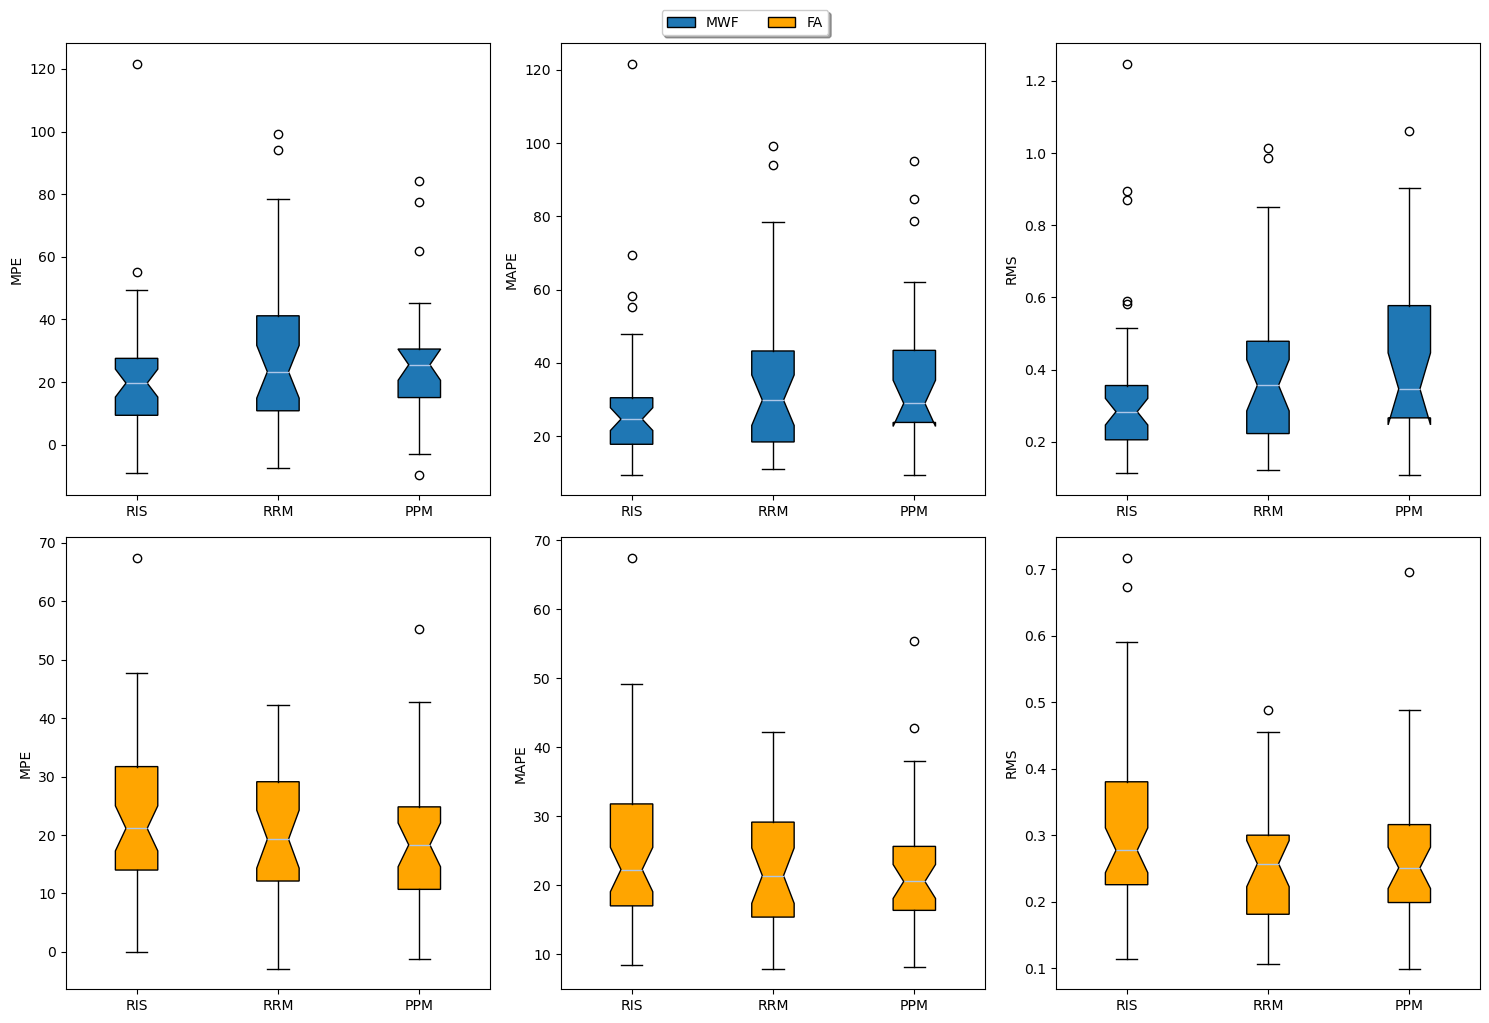

In [26]:
# plt.boxplot(box_data, patch_artist=True, notch='True')
# plt.show()

# fig, ax = plt.subplots()

# ax.boxplot(box_dict.values(), patch_artist=True, notch='True')
# ax.set_xticklabels(box_dict.keys())
# plt.ylabel("MAPE")
# plt.show()

# Create a 3x2 grid for subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
# Flatten axes for easier iteration
# ax = ax.flatten()

# row col
bp1 = ax[0,0].boxplot(mwf_mpe.values(), patch_artist=True, notch='True')
ax[0,0].set_xticklabels(mwf_mpe.keys())
ax[0,0].set_ylabel("MPE")

ax[0,1].boxplot(mwf_mape.values(), patch_artist=True, notch='True')
ax[0,1].set_xticklabels(mwf_mape.keys())
ax[0,1].set_ylabel("MAPE")

ax[0,2].boxplot(mwf_rms.values(), patch_artist=True, notch='True')
ax[0,2].set_xticklabels(mwf_rms.keys())
ax[0,2].set_ylabel("RMS")

bp2 = ax[1,0].boxplot(fa_mpe.values(), boxprops=dict(facecolor='orange'), patch_artist=True, notch='True')
ax[1,0].set_xticklabels(fa_mpe.keys())
ax[1,0].set_ylabel("MPE")

ax[1,1].boxplot(fa_mape.values(), boxprops=dict(facecolor='orange'), patch_artist=True, notch='True')
ax[1,1].set_xticklabels(fa_mape.keys())
ax[1,1].set_ylabel("MAPE")

ax[1,2].boxplot(fa_mpe_rms.values(), boxprops=dict(facecolor='orange'), patch_artist=True, notch='True')
ax[1,2].set_xticklabels(fa_mpe_rms.keys())
ax[1,2].set_ylabel("RMS")

# ax[0,0].legend([bp1["boxes"][0], bp2["boxes"][0]], ['MWF', 'FA'], loc='upper right')
# handles, labels = ax[0, 0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.01), fancybox=True, shadow=True, ncol=2)
fig.legend([bp1["boxes"][0], bp2["boxes"][0]], ['MWF', 'FA'], loc='upper center', bbox_to_anchor=(0.5, 1.025), fancybox=True, shadow=True, ncol=2)

plt.tight_layout()
plt.show()

### Anova Testing

#### MWF to MWF

In [63]:
####################### MPE #######################

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(ris_mwf_dict_mpe_vals, rrm_mwf_dict_mpe_vals, ppm_mwf_dict_mpe_vals)

# Print the results
print(" ------ MPE Anova test ------ ")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
# null hypothesis: the three groups have the same results
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between groups.")
else:
    print("Accept the null hypothesis. There are no significant differences between groups.")


####################### MAPE #######################

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(ris_mwf_dict_mape_vals, rrm_mwf_dict_mape_vals, ppm_mwf_dict_mape_vals)

# Print the results
print(" ------ MAPE Anova test ------ ")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
# null hypothesis: the three groups have the same results
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between groups.")
else:
    print("Accept the null hypothesis. There are no significant differences between groups.")

####################### RMS #######################

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(ris_mwf_dict_rms_vals, rrm_mwf_dict_rms_vals, ppm_mwf_dict_rms_vals)

# Print the results
print(" ------ RMS Anova test ------ ")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
# null hypothesis: the three groups have the same results
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between groups.")
else:
    print("Accept the null hypothesis. There are no significant differences between groups.")

 ------ MPE Anova test ------ 
F-statistic: 0.7902832187432223
p-value: 0.4567072667504576
Accept the null hypothesis. There are no significant differences between groups.
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   PPM    RIS  -4.3798 0.7471 -18.693  9.9334  False
   PPM    RRM   2.4111 0.9229 -12.627 17.4491  False
   RIS    RRM   6.7909  0.438 -6.3454 19.9271  False
----------------------------------------------------
 ------ MAPE Anova test ------ 
F-statistic: 1.2766405818933364
p-value: 0.28376470848701035
Accept the null hypothesis. There are no significant differences between groups.
 ------ RMS Anova test ------ 
F-statistic: 1.1271393044807207
p-value: 0.3282971221166264
Accept the null hypothesis. There are no significant differences between groups.


### FA to FA

In [52]:
####################### MPE #######################

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(ris_fa_dict_mpe_vals, rrm_fa_dict_mpe_vals, ppm_fa_dict_mpe_vals)

# Print the results
print(" ------ MPE Anova test ------ ")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
# null hypothesis: the three groups have the same results
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between groups.")
else:
    print("Accept the null hypothesis. There are no significant differences between groups.")


####################### MAPE #######################

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(ris_fa_dict_mape_vals, rrm_fa_dict_mape_vals, ppm_fa_dict_mape_vals)

# Print the results
print(" ------ MAPE Anova test ------ ")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
# null hypothesis: the three groups have the same results
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between groups.")
else:
    print("Accept the null hypothesis. There are no significant differences between groups.")

####################### RMS #######################

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(ris_fa_dict_rms_vals, rrm_fa_dict_rms_vals, ppm_fa_dict_rms_vals)

# Print the results
print(" ------ RMS Anova test ------ ")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
# null hypothesis: the three groups have the same results
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between groups.")
else:
    print("Accept the null hypothesis. There are no significant differences between groups.")

 ------ MPE Anova test ------ 
F-statistic: 1.2598641801480412
p-value: 0.2876464862138724
Accept the null hypothesis. There are no significant differences between groups.
 ------ MAPE Anova test ------ 
F-statistic: 1.1738227720715984
p-value: 0.31292378469337956
Accept the null hypothesis. There are no significant differences between groups.
 ------ RMS Anova test ------ 
F-statistic: 1.7872286839596487
p-value: 0.17212335847995425
Accept the null hypothesis. There are no significant differences between groups.


#### MWF to FA

In [49]:
####################### MPE #######################

#### RIS ####

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(ris_mwf_dict_mpe_vals, ris_fa_dict_mpe_vals)

# Print the results
print(" ------ MPE RIS Anova test ------ ")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
# null hypothesis: the three groups have the same results
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between groups.")
else:
    print("Accept the null hypothesis. There are no significant differences between groups.")

#### RIS ####
    
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(rrm_mwf_dict_mpe_vals, ppm_mwf_dict_mpe_vals)

# Print the results
print(" ------ MPE RRM Anova test ------ ")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
# null hypothesis: the three groups have the same results
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between groups.")
else:
    print("Accept the null hypothesis. There are no significant differences between groups.")

#### PPM ####

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(ppm_mwf_dict_mpe_vals, ppm_fa_dict_mpe_vals)

# Print the results
print(" ------ MPE PPM Anova test ------ ")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
# null hypothesis: the three groups have the same results
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between groups.")
else:
    print("Accept the null hypothesis. There are no significant differences between groups.")



 ------ MPE RIS Anova test ------ 
F-statistic: 0.041946804824878996
p-value: 0.8381786116000356
Accept the null hypothesis. There are no significant differences between groups.
 ------ MPE RRM Anova test ------ 
F-statistic: 0.13046082371356285
p-value: 0.7193640542599753
Accept the null hypothesis. There are no significant differences between groups.
 ------ MPE PPM Anova test ------ 
F-statistic: 2.709498746489585
p-value: 0.10525588440007456
Accept the null hypothesis. There are no significant differences between groups.


In [50]:
####################### MAPE #######################

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(ris_mwf_dict_mape_vals, ris_fa_dict_mape_vals)

# Print the results
print(" ------ MAPE RIS Anova test ------ ")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
# null hypothesis: the three groups have the same results
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between groups.")
else:
    print("Accept the null hypothesis. There are no significant differences between groups.")

#### RIS ####
    
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(rrm_mwf_dict_mape_vals, rrm_fa_dict_mape_vals)

# Print the results
print(" ------ MAPE RRM Anova test ------ ")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
# null hypothesis: the three groups have the same results
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between groups.")
else:
    print("Accept the null hypothesis. There are no significant differences between groups.")

#### PPM ####

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(ppm_mwf_dict_mape_vals, ppm_fa_dict_mape_vals)

# Print the results
print(" ------ MAPE PPM Anova test ------ ")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
# null hypothesis: the three groups have the same results
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between groups.")
else:
    print("Accept the null hypothesis. There are no significant differences between groups.")



 ------ MAPE RIS Anova test ------ 
F-statistic: 1.1303653255402102
p-value: 0.2905106561605547
Accept the null hypothesis. There are no significant differences between groups.
 ------ MAPE RRM Anova test ------ 
F-statistic: 8.39221946786108
p-value: 0.005279679967299648
Reject the null hypothesis. There are significant differences between groups.
 ------ MAPE PPM Anova test ------ 
F-statistic: 11.087623945266667
p-value: 0.001528237282241502
Reject the null hypothesis. There are significant differences between groups.


In [64]:
####################### RMS #######################

#### RIS ####

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(ris_mwf_dict_rms_vals, ris_fa_dict_rms_vals)

# Print the results
print(" ------ RMS RIS Anova test ------ ")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
# null hypothesis: the three groups have the same results
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between groups.")
else:
    print("Accept the null hypothesis. There are no significant differences between groups.")

#### RIS ####
    
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(rrm_mwf_dict_rms_vals, rrm_fa_dict_rms_vals)

# Print the results
print(" ------ RMS RRM Anova test ------ ")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
# null hypothesis: the three groups have the same results
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between groups.")
else:
    print("Accept the null hypothesis. There are no significant differences between groups.")

#### PPM ####

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(ppm_mwf_dict_rms_vals, ppm_fa_dict_rms_vals)

print(" ------ RMS PPM Anova test ------ ")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
# null hypothesis: the three groups have the same results
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between groups.")
else:
    print("Accept the null hypothesis. There are no significant differences between groups.")

 ------ RMS RIS Anova test ------ 
F-statistic: 0.7232645379202308
p-value: 0.3973073197596636
Accept the null hypothesis. There are no significant differences between groups.
 ------ RMS RRM Anova test ------ 
F-statistic: 9.277672318948026
p-value: 0.003465003770379361
Reject the null hypothesis. There are significant differences between groups.
 ------ RMS PPM Anova test ------ 
F-statistic: 10.177170496631588
p-value: 0.0023123584180565183
Reject the null hypothesis. There are significant differences between groups.


### Tukey test

#### MWF to MWF

In [70]:
print("                MPE")
# Combine all scores and corresponding group labels into a single array and a list of labels
scores = ris_mwf_dict_mpe_vals + rrm_mwf_dict_mpe_vals + ppm_mwf_dict_mpe_vals
groups = ['RIS'] * len(ris_mwf_dict_mpe_vals) + ['RRM'] * len(rrm_mwf_dict_mpe_vals) + ['PPM'] * len(ppm_mwf_dict_mpe_vals)
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(scores, groups)

print(tukey_results)

print("                MAPE")

# Combine all scores and corresponding group labels into a single array and a list of labels
scores = ris_mwf_dict_mape_vals + rrm_mwf_dict_mape_vals + ppm_mwf_dict_mape_vals
groups = ['RIS'] * len(ris_mwf_dict_mape_vals) + ['RRM'] * len(rrm_mwf_dict_mape_vals) + ['PPM'] * len(ppm_mwf_dict_mape_vals)
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(scores, groups)

print(tukey_results)

print("                RMS")

# Combine all scores and corresponding group labels into a single array and a list of labels
scores = ris_mwf_dict_rms_vals + rrm_mwf_dict_rms_vals + ppm_mwf_dict_rms_vals
groups = ['RIS'] * len(ris_mwf_dict_rms_vals) + ['RRM'] * len(rrm_mwf_dict_rms_vals) + ['PPM'] * len(ppm_mwf_dict_rms_vals)
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(scores, groups)

print(tukey_results)

                MPE
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   PPM    RIS  -4.3798 0.7471 -18.693  9.9334  False
   PPM    RRM   2.4111 0.9229 -12.627 17.4491  False
   RIS    RRM   6.7909  0.438 -6.3454 19.9271  False
----------------------------------------------------
                MAPE
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   PPM    RIS  -7.8535 0.3395 -21.1106  5.4035  False
   PPM    RRM   -1.444  0.967 -15.3724 12.4844  False
   RIS    RRM   6.4095 0.4244  -5.7574 18.5765  False
-----------------------------------------------------
                RMS
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   PPM    RIS  -0.0844 0.3493 -0.2

#### FA to FA

In [79]:

print("                MPE")
# Combine all scores and corresponding group labels into a single array and a list of labels
scores = ris_fa_dict_mpe_vals + rrm_fa_dict_mpe_vals + ppm_fa_dict_mpe_vals
groups = ['RIS'] * len(ris_fa_dict_mpe_vals) + ['RRM'] * len(rrm_fa_dict_mpe_vals) + ['PPM'] * len(ppm_fa_dict_mpe_vals)
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(scores, groups)

print(tukey_results)

print("                MAPE")

# Combine all scores and corresponding group labels into a single array and a list of labels
scores = ris_fa_dict_mape_vals + rrm_fa_dict_mape_vals + ppm_fa_dict_mape_vals
groups = ['RIS'] * len(ris_fa_dict_mape_vals) + ['RRM'] * len(rrm_fa_dict_mape_vals) + ['PPM'] * len(ppm_fa_dict_mape_vals)
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(scores, groups)

print(tukey_results)

print("                RMS")

# Combine all scores and corresponding group labels into a single array and a list of labels
scores = ris_fa_dict_rms_vals + rrm_fa_dict_rms_vals + ppm_fa_dict_rms_vals
groups = ['RIS'] * len(ris_fa_dict_rms_vals) + ['RRM'] * len(rrm_fa_dict_rms_vals) + ['PPM'] * len(ppm_fa_dict_rms_vals)
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(scores, groups)

print(tukey_results)

                MPE
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   PPM    RIS   3.8227 0.3347   -2.576 10.2213  False
   PPM    RRM   0.4043 0.9906  -6.9446  7.7532  False
   RIS    RRM  -3.4184 0.4574 -10.2011  3.3644  False
-----------------------------------------------------
                MAPE
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   PPM    RIS   2.9932 0.3933 -2.4385 8.4249  False
   PPM    RRM    0.002    1.0 -6.2363 6.2403  False
   RIS    RRM  -2.9912 0.4358 -8.7489 2.7666  False
---------------------------------------------------
                RMS
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   PPM    RIS   0.0382 0.3346 -0.0257 0.1

#### MWF to FA

In [75]:
print("                MPE RIS")
# Combine all scores and corresponding group labels into a single array and a list of labels
scores = ris_mwf_dict_mpe_vals + ris_fa_dict_mpe_vals
groups = ['MWF'] * len(ris_mwf_dict_mpe_vals) + ['FA'] * len(ris_fa_dict_mpe_vals)
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(scores, groups)

print(tukey_results)

print("                MPE RRM")

# Combine all scores and corresponding group labels into a single array and a list of labels
scores = rrm_mwf_dict_mpe_vals + rrm_fa_dict_mpe_vals
groups = ['MWF'] * len(rrm_mwf_dict_mpe_vals) + ['FA'] * len(rrm_fa_dict_mpe_vals)
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(scores, groups)

print(tukey_results)

print("                MPE PPM")

# Combine all scores and corresponding group labels into a single array and a list of labels
scores = ppm_mwf_dict_mpe_vals + ppm_fa_dict_mpe_vals
groups = ['MWF'] * len(ppm_mwf_dict_mpe_vals) + ['FA'] * len(ppm_fa_dict_mpe_vals)
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(scores, groups)

print(tukey_results)

                MPE RIS
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    FA    MWF  -0.7397 0.8382 -7.9135 6.4342  False
---------------------------------------------------
                MPE RRM
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    FA    MWF   9.4696 0.076 -1.0218 19.961  False
--------------------------------------------------
                MPE PPM
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    FA    MWF   7.4628 0.1053 -1.6159 16.5415  False
----------------------------------------------------


In [77]:
print("                MAPE RIS")
# Combine all scores and corresponding group labels into a single array and a list of labels
scores = ris_mwf_dict_mape_vals + ris_fa_dict_mape_vals
groups = ['MWF'] * len(ris_mwf_dict_mape_vals) + ['FA'] * len(ris_fa_dict_mape_vals)
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(scores, groups)

print(tukey_results)

print("                MAPE RRM")

# Combine all scores and corresponding group labels into a single array and a list of labels
scores = rrm_mwf_dict_mape_vals + rrm_fa_dict_mape_vals
groups = ['MWF'] * len(rrm_mwf_dict_mape_vals) + ['FA'] * len(rrm_fa_dict_mape_vals)
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(scores, groups)

print(tukey_results)

print("                MAPE PPM")

# Combine all scores and corresponding group labels into a single array and a list of labels
scores = ppm_mwf_dict_mape_vals + ppm_fa_dict_mape_vals
groups = ['MWF'] * len(ppm_mwf_dict_mape_vals) + ['FA'] * len(ppm_fa_dict_mape_vals)
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(scores, groups)

print(tukey_results)

                MAPE RIS
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    FA    MWF   3.5554 0.2905 -3.0872 10.198  False
---------------------------------------------------
                MAPE RRM
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    FA    MWF  12.9561 0.0053 4.007 21.9053   True
--------------------------------------------------
                MAPE PPM
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    FA    MWF  14.4021 0.0015 5.741 23.0632   True
--------------------------------------------------


In [78]:
print("                RMS RIS")
# Combine all scores and corresponding group labels into a single array and a list of labels
scores = ris_mwf_dict_rms_vals + ris_fa_dict_rms_vals
groups = ['MWF'] * len(ris_mwf_dict_rms_vals) + ['FA'] * len(ris_fa_dict_rms_vals)
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(scores, groups)

print(tukey_results)

print("                RMS RRM")

# Combine all scores and corresponding group labels into a single array and a list of labels
scores = rrm_mwf_dict_rms_vals + rrm_fa_dict_rms_vals
groups = ['MWF'] * len(rrm_mwf_dict_rms_vals) + ['FA'] * len(rrm_fa_dict_rms_vals)
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(scores, groups)

print(tukey_results)

print("                RMS PPM")

# Combine all scores and corresponding group labels into a single array and a list of labels
scores = ppm_mwf_dict_rms_vals + ppm_fa_dict_rms_vals
groups = ['MWF'] * len(ppm_mwf_dict_rms_vals) + ['FA'] * len(ppm_fa_dict_rms_vals)
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(scores, groups)

print(tukey_results)

                RMS RIS
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    FA    MWF   0.0328 0.3973 -0.0438 0.1093  False
---------------------------------------------------
                RMS RRM
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    FA    MWF    0.141 0.0035 0.0484 0.2337   True
--------------------------------------------------
                RMS PPM
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    FA    MWF   0.1554 0.0023 0.0579 0.2529   True
--------------------------------------------------
